In [1]:
### The following 3 imports expand the useable area of the notebook
### Adjust percents to make bigger or smaller
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
display(HTML("<style>.output_result { max-width:75% !important; }</style>"))
#display(HTML("<style>.prompt { display:none !important; }</style>"))

### the following import should let outputs scroll if they are too wide
#from IPython.display import display, HTML
#display(HTML("<style>pre { white-space: pre !important; }</style>"))

# important geophysical imports
# I use several methods to load packages  - as examples
from iovsp import segyin
from iovsp import segyout
from plotvsp.seisplots import wiggle_plot, four_plots, composite_plot
from procvsp.geometry import importascii, geovel, header_listing

# Best method is the one below, you always know where functions are 
# coming from
import procvsp.geometry as geom
import procvsp.spec as specvsp
import procvsp.sigproc as sgp
import procvsp.utils as utilvsp
import procvsp.decon as dec

## Load the VSP SEG-Y file  

 - uses segyio data loading package
 - source and receiver locations are assumed to be in SEG-Y trace headers
 - user needs to supply basic geometry parameters
      - seismic replacement velocity
      - surface seismic datum elevation
      - drill floor elevation
      - source elevation

In [2]:
######### get the downgoing and upgoing VSP SEG-Y data
    
filename1 = ('C:\\Users\\acampbell45\\Documents\\Python_Scripts'
        '\\Synthetic_data\\data\\down_flat.sgy')
    
filename2 = ('C:\\Users\\acampbell45\\Documents\\Python_Scripts'
        '\\Synthetic_data\\data\\residual_2wt.sgy')
        
# input desired geometry parameters
    
RepVel= 5000     # replacement velocity
SRD_ASL = 0    # SRD elevation above sea level
DF_ASL = 0    # drill floor elevation ASL
SrcElev = -10   # source elevation ASL

############ run basic loading functions ######### 

file_head = 'n'         # print binary and text header to screen    
pr_thead = 'y'          # print a table of trace headers    
down_flat, numsamp, samprate, fs, theader_decon =  segyin.readsegyio3(
                    filename1, file_head, 
                    DF_ASL, SrcElev, SRD_ASL, pr_thead)
    
up_flat, numsamp, samprate, fs, theader_dummy =  segyin.readsegyio3(
                    filename2, file_head, 
                    DF_ASL, SrcElev, SRD_ASL, pr_thead)

 table header file shape : (200, 15)
  Trc      Rcz      Rcz    Rcv X    Rcv Y    Src X    Src Y    Src Z      Obs      TVD     TVD     SrcZ    ILN    FFID    Src
  Num       MD      TVD                                                  Time      SRD     SrcZ     SRD
-----  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  ------  -----  ------  -----
    1   1050.0   1050.0      0.0      0.0      0.0      0.0     10.0   142.79   1050.0   1040.0   -10.0      0       0      0
    2   1100.0   1100.0      0.0      0.0      0.0      0.0     10.0   149.84   1100.0   1090.0   -10.0      0       0      0
    3   1150.0   1150.0      0.0      0.0      0.0      0.0     10.0   156.87   1150.0   1140.0   -10.0      0       0      0
    4   1200.0   1200.0      0.0      0.0      0.0      0.0     10.0   163.93   1200.0   1190.0   -10.0      0       0      0
    5   1250.0   1250.0      0.0      0.0      0.0      0.0     10.0   170.98   1250.0   1240.0   -10.0

 table header file shape : (200, 15)
  Trc      Rcz      Rcz    Rcv X    Rcv Y    Src X    Src Y    Src Z      Obs      TVD     TVD     SrcZ    ILN    FFID    Src
  Num       MD      TVD                                                  Time      SRD     SrcZ     SRD
-----  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  ------  -----  ------  -----
    1   1050.0   1050.0      0.0      0.0      0.0      0.0     10.0   142.79   1050.0   1040.0   -10.0      0       0      0
    2   1100.0   1100.0      0.0      0.0      0.0      0.0     10.0   149.84   1100.0   1090.0   -10.0      0       0      0
    3   1150.0   1150.0      0.0      0.0      0.0      0.0     10.0   156.87   1150.0   1140.0   -10.0      0       0      0
    4   1200.0   1200.0      0.0      0.0      0.0      0.0     10.0   163.93   1200.0   1190.0   -10.0      0       0      0
    5   1250.0   1250.0      0.0      0.0      0.0      0.0     10.0   170.98   1250.0   1240.0   -10.0

# Frequency Analysis  
A Tukey window is applied to the input trace, prior to FFT  


̲F̲r̲A̲n̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
fs : 1000.0


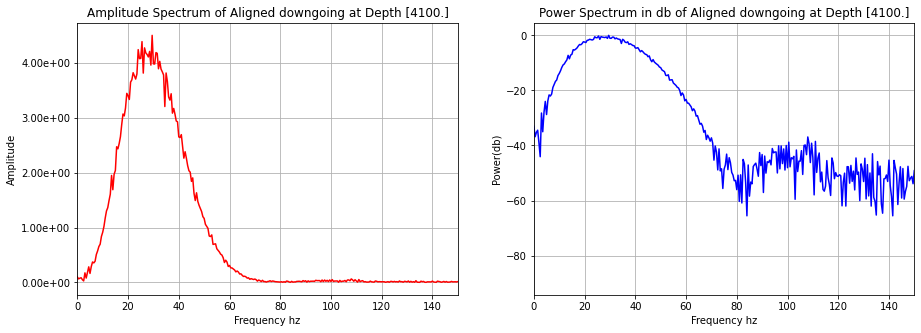

In [3]:
###########  FRequency ANalysis 
    
trace = 61
time_win = 'y' # window trace prior to fft
time_range = [0, 2000]
freq_range = [0, 150]    
title_fran = 'Aligned downgoing'
specvsp.spec_1d(down_flat, time_range, freq_range, theader_decon, trace, fs, 
         time_win, title_fran)    

## Velocity Calculations for plots  
 - Calculate interval velocities. Shallowest velocity is calculated separately and tacked on to velocity array  
 - Generate a version which is rounded and truncated for display as text

In [4]:
############ geometry corrections and velocity calculations 
    
table = 'y'     # print a time-depth-velocity listing to screen y or n    
vel_headers = geovel( theader_decon, RepVel, table)
    


̲G̲e̲o̲v̲e̲l̲ ̲S̲t̲a̲t̲s̲ ̲:
 Theader shape (200, 15) Vheader shape: (200, 17)
 TVD_SRD shape : (200,)  IntVel shape : (200,)
 TVDSrc 2 vals   [1040. 1090.] 
 TVDSRD 2 vals  [1050. 1100.] 
 TTVert 2 vals   [142.792 149.842]
╒═════════════╤═════════════════╤═══════════╤═══════════╤══════════╕
│   Depth SRD │   Vert Time SRD │   Delta T │   Delta Z │       Vp │
╞═════════════╪═════════════════╪═══════════╪═══════════╪══════════╡
│        1050 │         142.792 │  0.142792 │      1050 │  7353.35 │
├─────────────┼─────────────────┼───────────┼───────────┼──────────┤
│        1100 │         149.842 │  0.00705  │        50 │  7092.2  │
├─────────────┼─────────────────┼───────────┼───────────┼──────────┤
│        1150 │         156.872 │  0.00703  │        50 │  7112.38 │
├─────────────┼─────────────────┼───────────┼───────────┼──────────┤
│        1200 │         163.932 │  0.00706  │        50 │  7082.15 │
├─────────────┼─────────────────┼───────────┼───────────┼──────────┤
│        1250 │ 

## Chose the desired trace range to process

In [5]:
############ trim arrays if requested 
    
first_rcv =1
last_rcv = 200   
up_edit, thead_dec_edit = utilvsp.depthlimit(up_flat,vel_headers, 
                                           first_rcv, last_rcv)      
down_edit, _ = utilvsp.depthlimit(down_flat,vel_headers, 
                                           first_rcv, last_rcv)


̲D̲e̲p̲t̲h̲l̲i̲m̲i̲t̲ ̲S̲t̲a̲t̲s̲ ̲:
 data shape :  (200, 5542)  data dtype :  float32
 headers shape : (200, 17)
 first : 0  last :  199
 headers new shape : (199, 17)
 data new shape :  (199, 5542)

̲D̲e̲p̲t̲h̲l̲i̲m̲i̲t̲ ̲S̲t̲a̲t̲s̲ ̲:
 data shape :  (200, 3300)  data dtype :  float32
 headers shape : (200, 17)
 first : 0  last :  199
 headers new shape : (199, 17)
 data new shape :  (199, 3300)


## Make a wiggle plot of upgoing and downgoing waves 

pol : n for normal or tape polarity, r to flip polarity  
spacing : 'z' is spread traces by receiver depth, else traces are evenly spaced  
skiplabel : plot every nth recever depth label at bottom of plot  
fs : sample rate in hertz, may be set elsewhere in notebook    
norm : plot trace normalization 'n' or 'y' 
scal : multiply every sample by this number to heat or cool plot  
info_wig : print diagnostic information to terminal  
timframe: 'owt' is one-way time, 'twt' is two-way time, 'flat' is flattened using a  


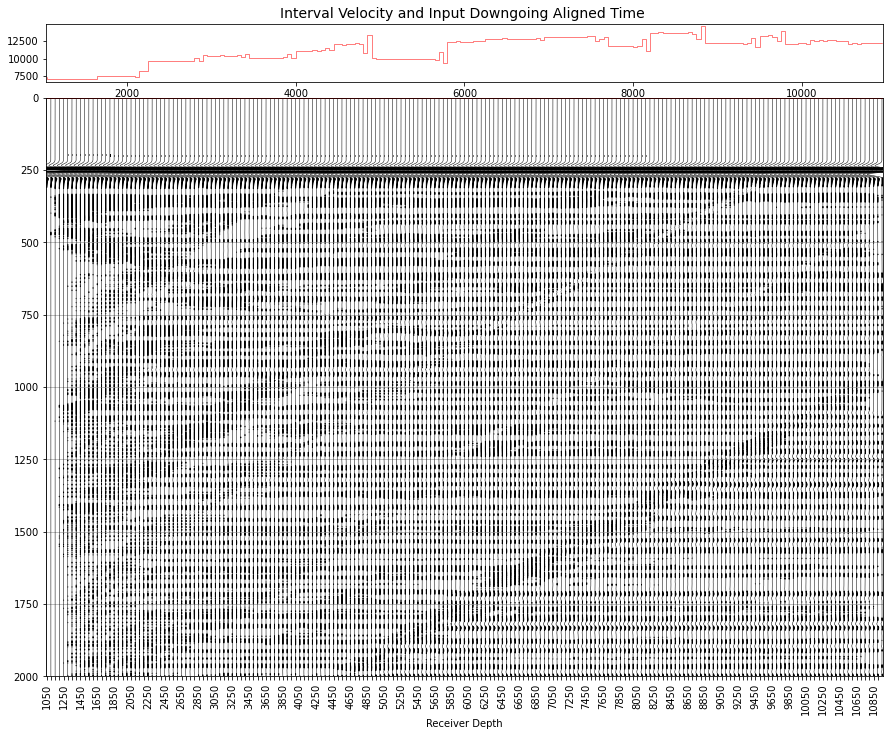

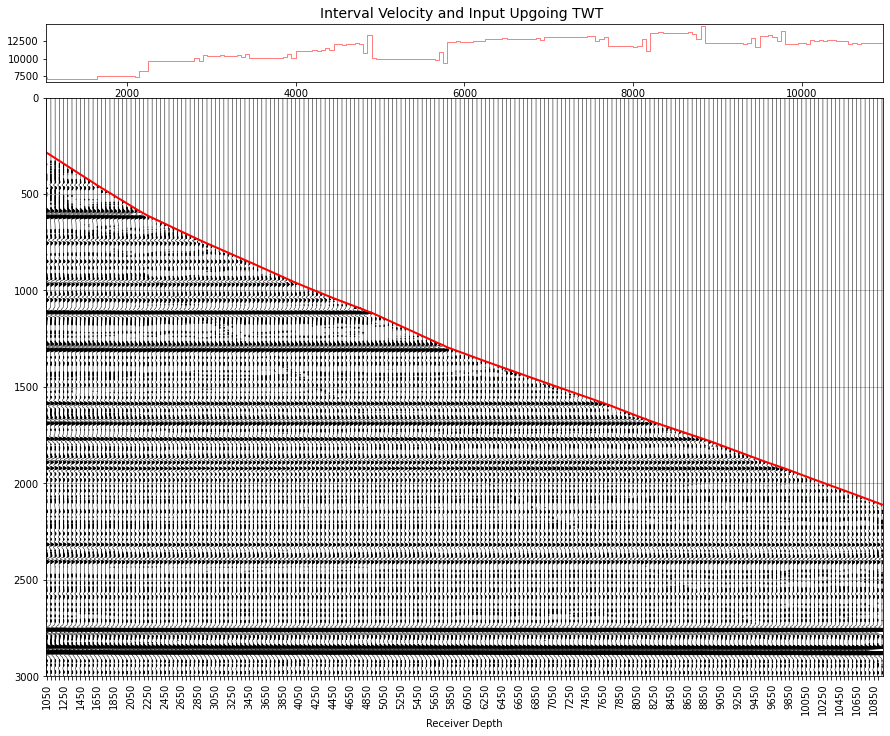

In [6]:
################## wiggle plot 

plot_params = {"pol":'n', 
                    "Tmax":2000, "Tmin":0, 
                    "first_rcv":first_rcv, 
                    "spacing":'z', 
                    "skiplabel":4, 
                    "fs":fs, 
                    "norm":'n',
                    "scal":1000, 
                    "title_top":'Input Downgoing Aligned Time ',
                    "info_wig":'n',
                    "timframe":'flat'} 
wiggle_plot(thead_dec_edit,down_edit, **plot_params)    

plot_params = {"pol":'n', 
                    "Tmax":3000, "Tmin":0, 
                    "first_rcv":first_rcv, 
                    "spacing":'z', 
                    "skiplabel":4, 
                    "fs":fs, 
                    "norm":'n',
                    "scal":2000, 
                    "title_top":'Input Upgoing TWT ',
                    "info_wig":'n',
                    "timframe":'twt'} 
wiggle_plot(thead_dec_edit,up_edit, **plot_params)

## Extract a trace from the downgoing and upgoing files for decon testing

In [7]:
############ extract a trace for deconvolution testing
    
trace = 61
downsingle, theader_dec1 = utilvsp.chosetrace(down_edit,thead_dec_edit, trace)     
upsingle, _ = utilvsp.chosetrace(up_edit, thead_dec_edit, trace) 
    


## Waveshaping Deconvolution  
Converted from Crewes Matlab  

Design filters on downgoing waves  
 - desired output is a Butterworth wavelet
 - trace by trace filter design

Filters are then applied to upgoing waves
 


̲W̲e̲i̲n̲e̲r̲_̲w̲a̲v̲e̲s̲h̲a̲p̲e̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
 fs  : 1000.0 
 N : 1024 
 order : 2 
 aligntime : 250

̲S̲h̲i̲f̲t̲i̲n̲g̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
 fs : 1000.0 
  atime : 250 
  first arr2 shape : (1, 4100)

̲W̲a̲v̲e̲t̲r̲a̲c̲e̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
 fs : 1000.0  numsamp : 1024
 plot_time shape : (4100,)
 wave shape : (1, 1024)  wavelets shape : (1, 4100)  wavelets_plot shape : (4100,)  waveshift shape : (1, 4350)  waveshift_plot shape : (4100,)
 np.argmax(cc_all[:,qc_trc]) : 2025
 values[5].shape[0] : 4000  cc_start, cc_end :  1000 3000


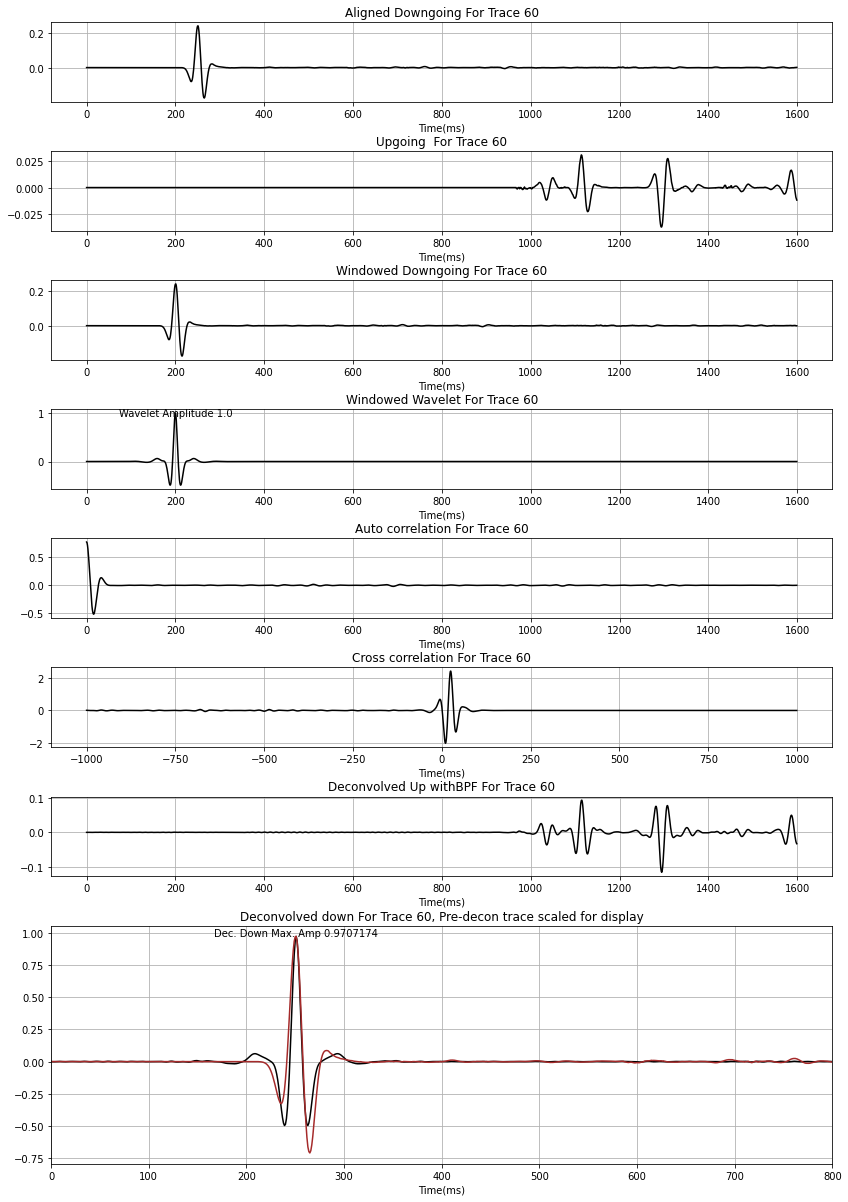

In [8]:
 ########### Waveshaping Decon - Weiner Filter 

wvdec_params = {'aligntime':250,
                      'wndw':1,
                      'stab':.0001,
                      'fs':fs,
                      'N':1024,
                      'backup':200, 
                      'winlngth':2000,
                      'lowcut':18, 
                      'highcut':55, 
                      'order':2,
                      'norm_wav':'y',
                      'qc_plot':'y', 'qc_trc':61, 'endplot':1600}
shaped_dwn,shaped_up = dec.Weiner_waveshape_decon(up_edit,down_edit,
                           thead_dec_edit,**wvdec_params)


## Make wiggle plots of deconvolved down and up waves 

pol : n for normal or tape polarity, r to flip polarity  
spacing : 'z' is spread traces by receiver depth, else traces are evenly spaced  
skiplabel : plot every nth recever depth label at bottom of plot  
fs : sample rate in hertz, may be set elsewhere in notebook    
norm : plot trace normalization 'n' or 'y' 
scal : multiply every sample by this number to heat or cool plot  
info_wig : print diagnostic information to terminal  
timframe: 'owt' is one-way time, 'twt' is two-way time, 'flat' is flattened using a  


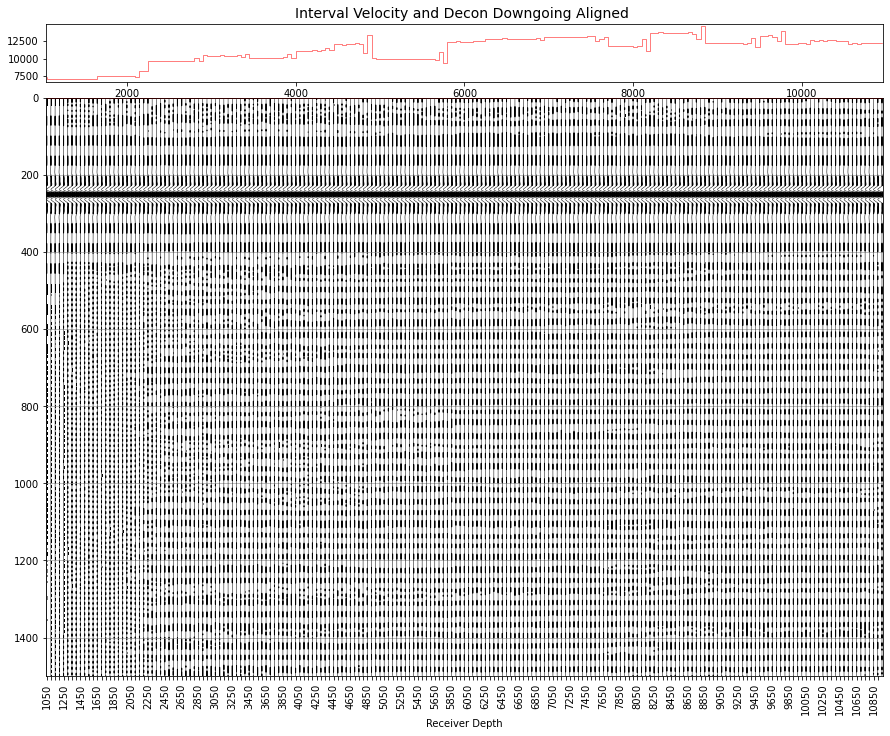

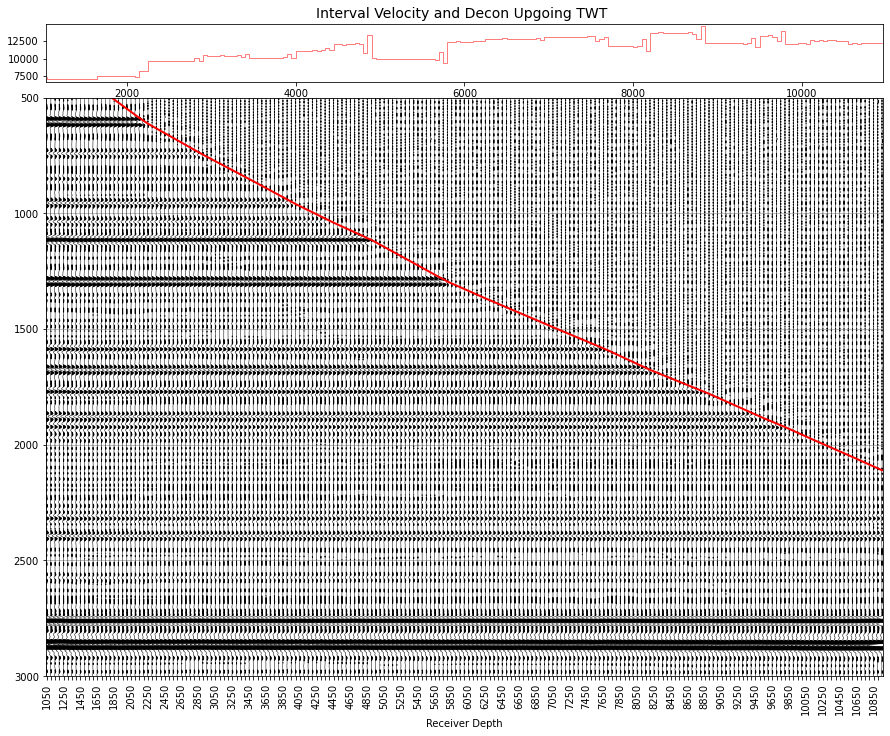

In [9]:
############ wiggle plots of downgoing, upgoing after decon

plot_params = {"pol":'n', 
                    "Tmax":1500, "Tmin":0, 
                    "first_rcv":first_rcv, 
                    "spacing":'z', 
                    "skiplabel":4, 
                    "fs":fs, 
                    "norm":'n',
                    "scal":100, 
                    "title_top":'Decon Downgoing Aligned ',
                    "info_wig":'n',
                    "timframe":'flat'} 
wiggle_plot(thead_dec_edit,shaped_dwn, **plot_params)

plot_params = {"pol":'n', 
                    "Tmax":3000, "Tmin":500, 
                    "first_rcv":first_rcv, 
                    "spacing":'z', 
                    "skiplabel":4, 
                    "fs":fs, 
                    "norm":'n',
                    "scal":500, 
                    "title_top":'Decon Upgoing TWT ',
                    "info_wig":'n',
                    "timframe":'twt'} 
wiggle_plot(thead_dec_edit,shaped_up, **plot_params)


## Apply a mute before break time to reduce noise  

Decon introduces some distracting noise, just zero it out

In [10]:
    # apply a mute before direct arrival time 
    tframe = 'twt' # owt or twt    
    mute_shaped_upwave2WT = utilvsp.mute(shaped_up,fs, thead_dec_edit, tframe)

## Make wiggle plots of muted deconvolved up waves 

pol : n for normal or tape polarity, r to flip polarity  
spacing : 'z' is spread traces by receiver depth, else traces are evenly spaced  
skiplabel : plot every nth recever depth label at bottom of plot  
fs : sample rate in hertz, may be set elsewhere in notebook    
norm : plot trace normalization 'n' or 'y' 
scal : multiply every sample by this number to heat or cool plot  
info_wig : print diagnostic information to terminal  
timframe: 'owt' is one-way time, 'twt' is two-way time, 'flat' is flattened using a  


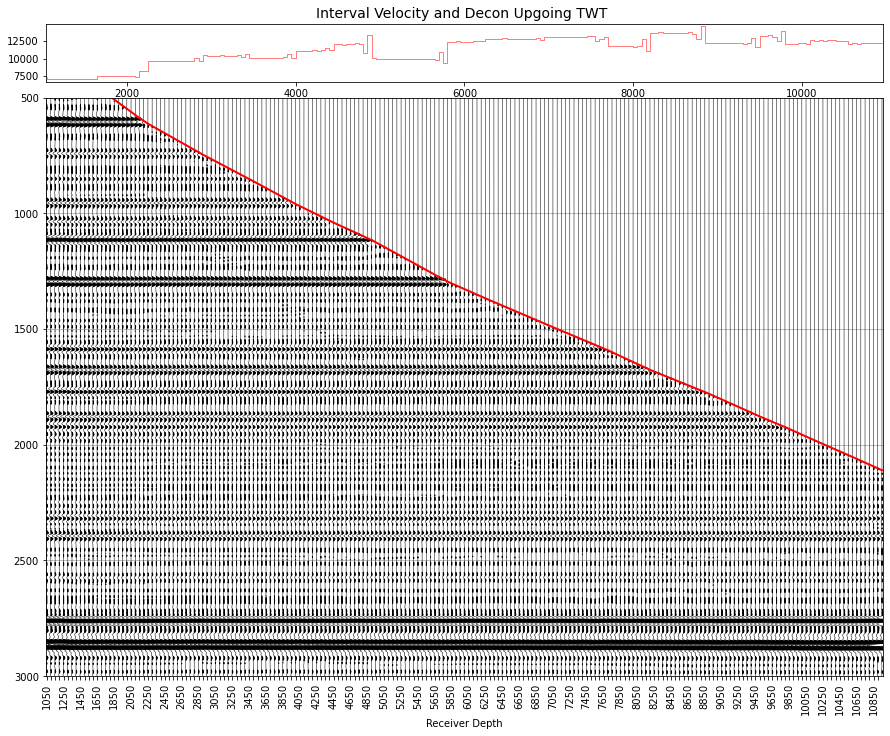

In [11]:
####### plot after muting before direct arrival
plot_params = {"pol":'n', 
                    "Tmax":3000, "Tmin":500, 
                    "first_rcv":first_rcv, 
                    "spacing":'z', 
                    "skiplabel":4, 
                    "fs":fs, 
                    "norm":'n',
                    "scal":500, 
                    "title_top":'Decon Upgoing TWT ',
                    "info_wig":'n',
                    "timframe":'twt'} 
wiggle_plot(thead_dec_edit,mute_shaped_upwave2WT, **plot_params)
    

## Generate a Corridor Stack  
Design a corridor near the downgoing arrivals which should contain only primaries  
 - mutliples are delayed from the primaries and do not reach the direct arrival  

Keep few deep trace so that the corridor stack continues below td

corrwin: delay time from arrival time to apply a tail mute - avoid multiples!  
keeptrcs: don't mute the bottom n traces  
repeat: corridor stack is a single trace. For a nice plot, repeat it n times


In [12]:
corrwin = 200 # mute delay after break time
keeptrcs = 10 # do not mute the bottom n traces
repeat = 8 # make n copies of stack trace
corr_in, corr_stk = sgp.cstack(mute_shaped_upwave2WT,thead_dec_edit,fs, corrwin, keeptrcs, repeat)

 np.nanmax(corrmute) : 0.27362504601478577  np.nanmax(corrstk) : 0.268966868519783


## Make L plot of corridor stack

pol : n for normal or tape polarity, r to flip polarity  
spacing : 'z' is spread traces by receiver depth, else traces are evenly spaced  
skiplabel : plot every nth recever depth label at bottom of plot  
fs : sample rate in hertz, may be set elsewhere in notebook    
norm : plot trace normalization 'n' or 'y' 
scal : multiply every sample by this number to heat or cool plot  
info_wig : print diagnostic information to terminal  
timframe: 'owt' is one-way time, 'twt' is two-way time, 'flat' is flattened using a  


 pol : n  comp scalar : -7.177033492822966


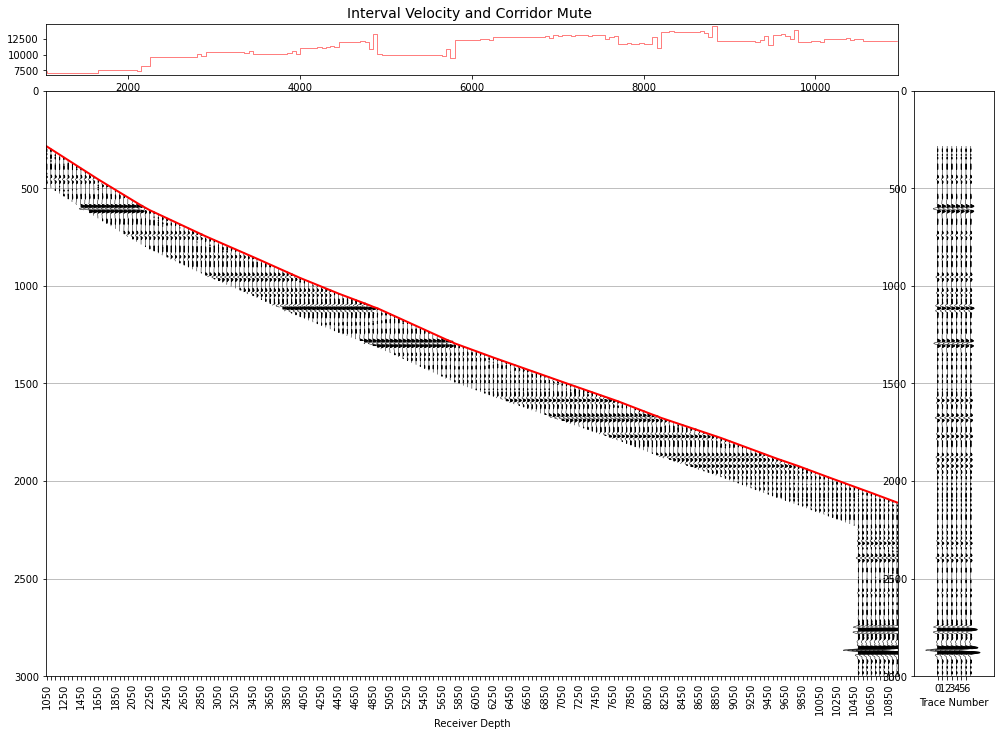


̲W̲i̲g̲g̲l̲e̲ ̲P̲l̲o̲t̲ ̲G̲l̲o̲b̲a̲l̲ ̲I̲n̲f̲o̲r̲m̲a̲t̲i̲o̲n̲ ̲:
 Number of traces in plot : 199  Number of samples per trace : 4100
 VSPdata type : float64
 datascaled shape [0] 199  datascaled shape [1] 4100
 thead shape : (199, 17)
 Min TVDSRD - pad 1040.0  Pad : 10
 Max TVDSRD + pad 10960.0  Pad : 10
 min max intvel : 7082.152974504239 14577.25947521847


In [13]:
####### plot after muting before direct arrival
plot_params = {"pol":'n', 
                    "Tmax":3000, "Tmin":0, 
                    "first_rcv":first_rcv, 
                    "spacing":'z', 
                    "skiplabel":4, 
                    "fs":fs, 
                    "norm":'n',
                    "scal":500, 
                    "title_top":'Corridor Mute ',
                    "info_wig":'y',
                    "timframe":'twt'} 
composite_plot(thead_dec_edit,corr_in,corr_stk, **plot_params)
    